In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [87]:
pd.options.display.max_columns = 50  # allows viewing all columns

In [2]:
df = pd.read_csv('data/aviation_cleaned.csv')

/Users/samalainabayeva/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (18,19,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [114]:
df.head(2)

,event_id,investigation_type,accident_number,event_date,location,country,airport_code,airport_name,injury_severity,aircraft_damage,aircraft_category,make,model,amateur_built,number_of_engines,engine_type,purpose_of_flight,air_carrier,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,survivable_injuries,year_of_event,states_names
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",united states,Unknown,Unknown,Fatal(2),Destroyed,Unknown,stinson,108-3,No,1.0,Reciprocating,Personal,Unknown,2.0,0.0,0.0,0.0,Unknown,Cruise,Probable Cause,0.0,1948,ID
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",united states,Unknown,Unknown,Fatal(4),Destroyed,Unknown,piper,PA24-180,No,1.0,Reciprocating,Personal,Unknown,4.0,0.0,0.0,0.0,Unknown,Unknown,Probable Cause,0.0,1962,CA


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   event_id                88889 non-null  object 
 1   investigation_type      88889 non-null  object 
 2   accident_number         88889 non-null  object 
 3   event_date              88889 non-null  object 
 4   location                88889 non-null  object 
 5   country                 88889 non-null  object 
 6   airport_code            88889 non-null  object 
 7   airport_name            88889 non-null  object 
 8   injury_severity         88889 non-null  object 
 9   aircraft_damage         88889 non-null  object 
 10  aircraft_category       88889 non-null  object 
 11  make                    88889 non-null  object 
 12  model                   88889 non-null  object 
 13  amateur_built           88889 non-null  object 
 14  number_of_engines       88889 non-null

### Need to convert injury columns to ints...

In [170]:
df['total_fatal_injuries'] = df['total_fatal_injuries'].map(lambda x: float(x) if x != "Unknown" else x)

In [171]:
df['total_serious_injuries'] = df['total_serious_injuries'].map(lambda x: float(x) if x != "Unknown" else x)

In [172]:
df['total_minor_injuries'] =df['total_minor_injuries'].map(lambda x: float(x) if x != "Unknown" else x)

### REPLACING 'Unknown' with Median values - all zeros

In [173]:
df['total_minor_injuries'] = df['total_minor_injuries'].replace("Unknown", 0)

In [174]:
df['total_serious_injuries'] = df['total_serious_injuries'].replace("Unknown", 0)

In [175]:
df['total_fatal_injuries'] = df['total_fatal_injuries'].replace("Unknown", 0)

### CREATING NEW COLUMN FOR NON-FATAL INJURIES

In [176]:
df["survivable_injuries"] = (df['total_minor_injuries'].replace("Unknown", 0)) + (df["total_serious_injuries"].replace("Unknown", 0))

In [177]:
df['survivable_injuries'].value_counts()

0.0      63365
1.0      15270
2.0       6903
3.0       1580
4.0        901
         ...  
172.0        1
57.0         1
46.0         1
80.0         1
64.0         1
Name: survivable_injuries, Length: 74, dtype: int64

### MISC DATA STUFF - CLEAN IT UP WHEN POSSIBLE

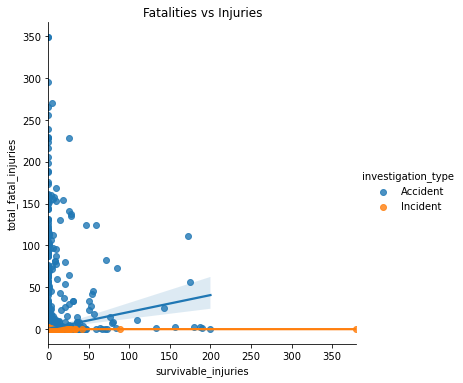

In [163]:
sns.lmplot(y='total_fatal_injuries', x='survivable_injuries', data = df, hue='investigation_type')
plt.title("Fatalities vs Injuries");

In [15]:
boeing_inc = df[(df['make'] == "BOEING") & (df['investigation_type'] == 'Incident')]

# SEPARATING STATES / ASSIGNING REGIONS

In [61]:
df["states_names"] = df['location'].map(lambda x: x[-2:])

In [72]:
central = ["WI", 'MN', 'IL', 'IA', 'IN', 'MI', 'MO', 'KS', 'ND', 'SD', 'NE', 'OK', 'TX']

In [67]:
northeast = ["ME", 'WV', 'DC', 'OH', 'RI', 'NH', 'VT', 'CT', 'PA', 'MA', 'DE', 'NY', 'NJ', 'MD']

In [68]:
southeast = ['VA', 'NC', 'SC', 'GA', 'AL', 'MS', 'LA', 'TN', 'AR', 'KY', 'FL']

In [80]:
west = ['MT', 'WY', 'CO', 'NM', 'AZ', 'NV', 'UT', 'ID', 'WA', 'OR', 'CA', 'HI', 'AK']

In [76]:
len(central + northeast + southeast + west_states)

51

In [94]:
df.head(2)

,event_id,investigation_type,accident_number,event_date,location,country,airport_code,airport_name,injury_severity,aircraft_damage,aircraft_category,make,model,amateur_built,number_of_engines,engine_type,purpose_of_flight,air_carrier,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,survivable_injuries,year_of_event,states_names
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",united states,Unknown,Unknown,Fatal(2),Destroyed,Unknown,stinson,108-3,No,1.0,Reciprocating,Personal,Unknown,2,0,0,0.0,Unknown,Cruise,Probable Cause,0.0,1948,ID
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",united states,Unknown,Unknown,Fatal(4),Destroyed,Unknown,piper,PA24-180,No,1.0,Reciprocating,Personal,Unknown,4,0,0,0.0,Unknown,Unknown,Probable Cause,0.0,1962,CA


### CENTRAL STATES

In [178]:
central_states = df.loc[(df['states_names'].isin(central)  == True) & (df["country"] == 'united states')]

In [179]:
central_states["states_names"].unique()

array(['MN', 'TX', 'OK', 'MI', 'IN', 'MO', 'IL', 'KS', 'IA', 'WI', 'SD',
       'NE', 'ND'], dtype=object)

In [180]:
central_states.describe()

,total_fatal_injuries,total_serious_injuries,total_minor_injuries,survivable_injuries,year_of_event
count,20799.000000,20799.000000,20799.000000,20799.000000,20799.000000
mean,0.323910,0.208904,0.283764,0.492668,1998.079283
std,1.907199,0.720522,1.339468,1.770062,11.807427
min,0.000000,0.000000,0.000000,0.000000,1981.000000
25%,0.000000,0.000000,0.000000,0.000000,1987.000000
50%,0.000000,0.000000,0.000000,0.000000,1996.000000
75%,0.000000,0.000000,0.000000,1.000000,2008.000000
max,156.000000,47.000000,125.000000,172.000000,2022.000000


In [287]:
c_plot = central_states.loc[:, ['total_fatal_injuries', 'survivable_injuries']].sum()
c_plot

total_fatal_injuries     6737.0
survivable_injuries     10247.0
dtype: float64

### Weather for Reports w Fatalities

In [293]:
central_states.loc[central_states['total_fatal_injuries'] >= 1]['weather_condition'].value_counts()

VMC        2778
IMC         721
Unknown      57
Name: weather_condition, dtype: int64

In [291]:
c_weather_ratio = (central_states.loc[central_states['total_fatal_injuries'] >= 1]['weather_condition'].value_counts())/721
c_weather_ratio

VMC        3.852982
IMC        1.000000
Unknown    0.079057
Name: weather_condition, dtype: float64

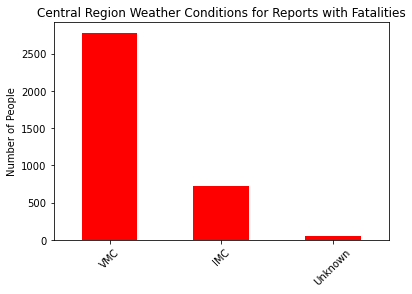

In [399]:
central_states.loc[central_states['total_fatal_injuries'] >= 1]['weather_condition'].value_counts().plot(kind='bar', 
                            title="Central Region Weather Conditions for Reports with Fatalities",
                            ylabel="Number of People", color='red', rot=45);

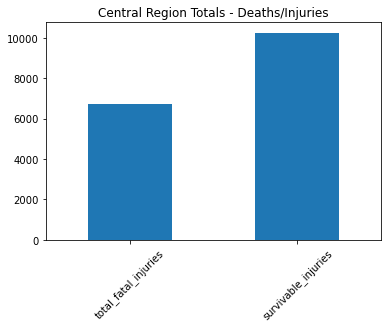

In [400]:
central_states.loc[:, ['total_fatal_injuries', 'survivable_injuries']].sum().plot(kind='bar', 
                        title= "Central Region Totals - Deaths/Injuries", rot=45);

In [309]:
central_states.head(2)

,event_id,investigation_type,accident_number,event_date,location,country,airport_code,airport_name,injury_severity,aircraft_damage,aircraft_category,make,model,amateur_built,number_of_engines,engine_type,purpose_of_flight,air_carrier,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,survivable_injuries,year_of_event,states_names
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",united states,Unknown,Unknown,Fatal(4),Destroyed,Unknown,cessna,180,No,1.0,Reciprocating,Personal,Unknown,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,0.0,1981,MN
13,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",united states,T72,HEARNE MUNICIPAL,Fatal(1),Destroyed,Airplane,cessna,R172K,No,1.0,Reciprocating,Personal,Unknown,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,0.0,1982,TX


# TOP TEN MAKE STATS FOR THE CENTRAL REGION

In [326]:
cent_top_ten_list = list(central_states['make'].value_counts()[:10].index)

In [343]:
central_top_ten_df = central_states.loc[central_states['make'].isin(cent_top_ten_list) == True]
central_top_ten_df['make'].value_counts()

cessna         6519
piper          3515
beech          1416
bell            498
boeing          390
mooney          304
grumman         276
air tractor     272
bellanca        262
hughes          203
Name: make, dtype: int64

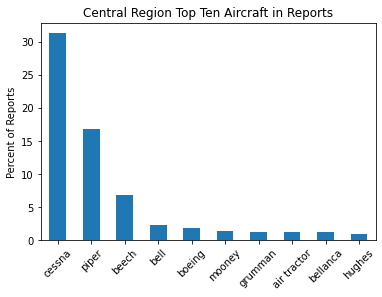

In [386]:
(central_states['make'].value_counts(normalize=True)[:10] * 100).plot(kind='bar', 
                            title="Central Region Top Ten Aircraft in Reports", ylabel= "Percent of Reports", rot=45);

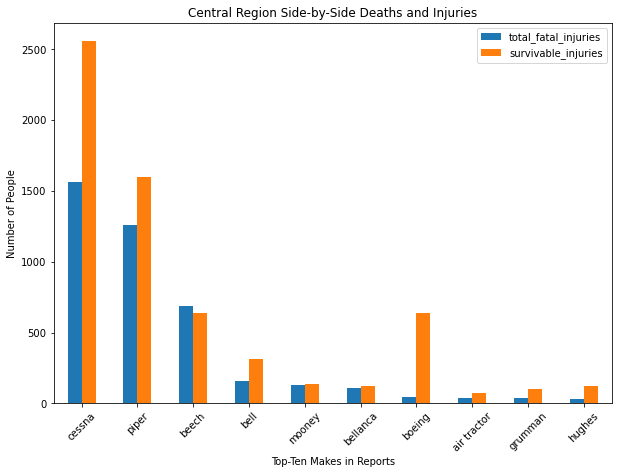

In [389]:
central_top_ten_df.groupby('make')[["total_fatal_injuries", 'survivable_injuries']].sum().sort_values(by="total_fatal_injuries", ascending=False).plot(
    kind='bar', figsize=(10,7), title="Central Region Side-by-Side Deaths and Injuries", 
    ylabel="Number of People", xlabel= "Top-Ten Makes in Reports", rot=45);

### NORTHEAST STATES

In [390]:
northeast_states = df.loc[(df['states_names'].isin(northeast)  == True)  & (df["country"] == 'united states')] 

In [187]:
northeast_states["states_names"].unique()

array(['OH', 'MA', 'NJ', 'PA', 'NY', 'MD', 'WV', 'DC', 'VT', 'NH', 'CT',
       'ME', 'RI', 'DE'], dtype=object)

In [183]:
northeast_states.describe()

,total_fatal_injuries,total_serious_injuries,total_minor_injuries,survivable_injuries,year_of_event
count,10806.000000,10806.00000,10806.000000,10806.000000,10806.000000
mean,0.424209,0.24727,0.338331,0.585601,1997.650935
std,4.047445,1.56066,1.231811,2.083591,11.581909
min,0.000000,0.00000,0.000000,0.000000,1979.000000
25%,0.000000,0.00000,0.000000,0.000000,1987.000000
50%,0.000000,0.00000,0.000000,0.000000,1996.000000
75%,0.000000,0.00000,0.000000,1.000000,2007.000000
max,265.000000,125.00000,36.000000,133.000000,2022.000000


In [292]:
n_plot = northeast_states.loc[:, ['total_fatal_injuries', 'survivable_injuries']].sum()
n_plot

total_fatal_injuries    4584.0
survivable_injuries     6328.0
dtype: float64

In [295]:
northeast_states.loc[northeast_states['total_fatal_injuries'] >= 1]['weather_condition'].value_counts()

VMC        1423
IMC         532
Unknown      36
Name: weather_condition, dtype: int64

In [297]:
ne_weather_ratio = northeast_states.loc[northeast_states['total_fatal_injuries'] >= 1]['weather_condition'].value_counts()/532
ne_weather_ratio

VMC        2.674812
IMC        1.000000
Unknown    0.067669
Name: weather_condition, dtype: float64

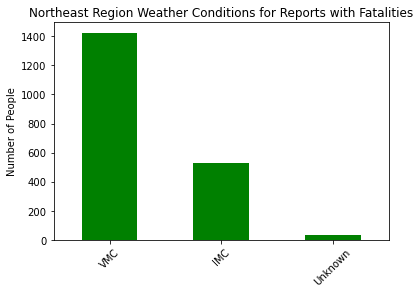

In [397]:
northeast_states.loc[northeast_states['total_fatal_injuries'] >= 1]['weather_condition'].value_counts().plot(kind='bar', 
                            title="Northeast Region Weather Conditions for Reports with Fatalities", 
                            ylabel="Number of People", color='green', rot=45);

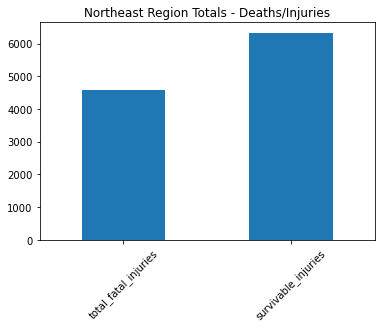

In [396]:
northeast_states.loc[:, ['total_fatal_injuries', 'survivable_injuries']].sum().plot(kind='bar', 
                            title= "Northeast Region Totals - Deaths/Injuries", rot=45);

# TOP TEN MAKE STATS FOR THE NORTHEAST

In [359]:
northeast_top_ten_list = list(northeast_states['make'].value_counts()[:10].index)

In [361]:
northeast_top_ten_df = northeast_states.loc[northeast_states['make'].isin(northeast_top_ten_list) == True]
northeast_top_ten_df['make'].value_counts()

cessna       3318
piper        2142
beech         638
boeing        245
mooney        224
bell          198
schweizer     156
robinson      134
bellanca      125
aeronca       124
Name: make, dtype: int64

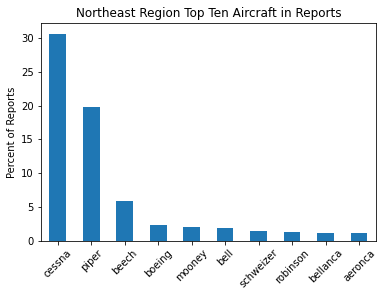

In [401]:
(northeast_states['make'].value_counts(normalize=True)[:10] * 100).plot(kind='bar', 
                            title="Northeast Region Top Ten Aircraft in Reports", 
                            ylabel= "Percent of Reports", rot=45);

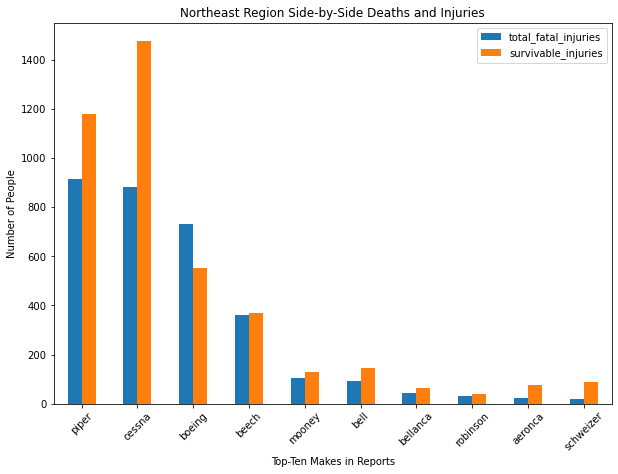

In [404]:
northeast_top_ten_df.groupby('make')[["total_fatal_injuries", 'survivable_injuries']].sum().sort_values(by="total_fatal_injuries", ascending=False).plot(
    kind='bar', figsize=(10,7), title="Northeast Region Side-by-Side Deaths and Injuries", 
    ylabel="Number of People", xlabel= "Top-Ten Makes in Reports", rot=45);

### SOUTHEAST STATES

In [191]:
southeast_states = df.loc[(df['states_names'].isin(southeast)  == True) & (df["country"] == 'united states')]

In [192]:
southeast_states["states_names"].unique()

array(['VA', 'FL', 'AL', 'LA', 'AR', 'GA', 'NC', 'SC', 'MS', 'KY', 'TN'],
      dtype=object)

In [193]:
southeast_states.describe()

,total_fatal_injuries,total_serious_injuries,total_minor_injuries,survivable_injuries,year_of_event
count,18217.000000,18217.000000,18217.000000,18217.000000,18217.000000
mean,0.378932,0.224351,0.284679,0.509030,1998.740352
std,1.811179,0.728523,1.088065,1.478709,11.761047
min,0.000000,0.000000,0.000000,0.000000,1974.000000
25%,0.000000,0.000000,0.000000,0.000000,1988.000000
50%,0.000000,0.000000,0.000000,0.000000,1997.000000
75%,0.000000,0.000000,0.000000,1.000000,2008.000000
max,153.000000,45.000000,65.000000,110.000000,2022.000000


In [226]:
s_plot = southeast_states.loc[:, ['total_fatal_injuries', 'survivable_injuries']].sum()

In [298]:
southeast_states.loc[southeast_states['total_fatal_injuries'] >= 1]['weather_condition'].value_counts()

VMC        2726
IMC         818
Unknown      63
Name: weather_condition, dtype: int64

In [300]:
se_weather_ratio = southeast_states.loc[southeast_states['total_fatal_injuries'] >= 1]['weather_condition'].value_counts()/818
se_weather_ratio

VMC        3.332518
IMC        1.000000
Unknown    0.077017
Name: weather_condition, dtype: float64

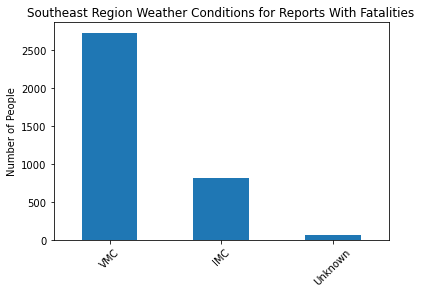

In [406]:
southeast_states.loc[southeast_states['total_fatal_injuries'] >= 1]['weather_condition'].value_counts().plot(kind='bar', 
            title="Southeast Region Weather Conditions for Reports With Fatalities", ylabel="Number of People", rot=45);

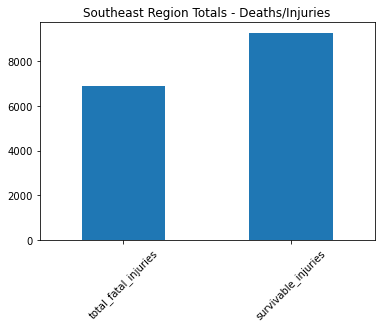

In [408]:
southeast_states.loc[:, ['total_fatal_injuries', 'survivable_injuries']].sum().plot(kind='bar', 
                    title= "Southeast Region Totals - Deaths/Injuries", rot=45);

# TOP TEN MAKE STATS FOR SOUTHEAST REGION

In [366]:
southeast_top_ten_list = list(southeast_states['make'].value_counts()[:10].index)

In [367]:
southeast_top_ten_df = southeast_states.loc[southeast_states['make'].isin(southeast_top_ten_list) == True]
southeast_top_ten_df['make'].value_counts()

cessna         5396
piper          3056
beech          1318
bell            536
grumman         448
boeing          336
mooney          323
air tractor     264
hughes          196
bellanca        187
Name: make, dtype: int64

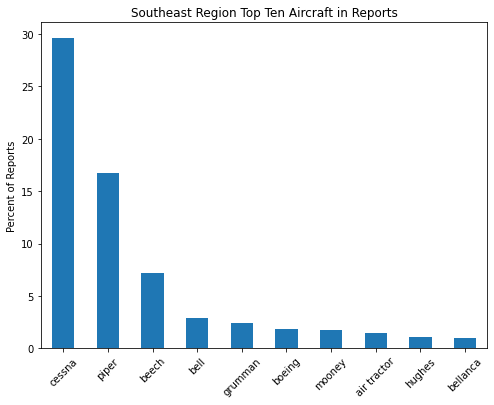

In [410]:
(southeast_states['make'].value_counts(normalize=True)[:10] * 100).plot(kind='bar', 
                            title="Southeast Region Top Ten Aircraft in Reports", 
                            ylabel= "Percent of Reports", rot=45, figsize=(8,6));

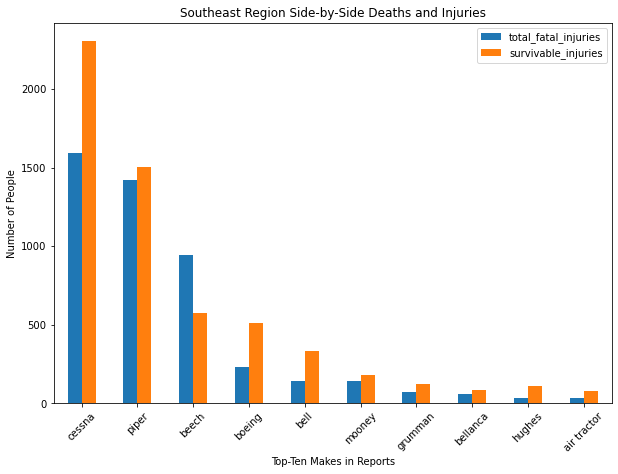

In [412]:
southeast_top_ten_df.groupby('make')[["total_fatal_injuries", 'survivable_injuries']].sum().sort_values(by="total_fatal_injuries", ascending=False).plot(
    kind='bar', figsize=(10,7), title="Southeast Region Side-by-Side Deaths and Injuries", 
    ylabel="Number of People", xlabel= "Top-Ten Makes in Reports", rot=45);

### WEST STATES

In [413]:
west_states.head(2)

,event_id,investigation_type,accident_number,event_date,location,country,airport_code,airport_name,injury_severity,aircraft_damage,aircraft_category,make,model,amateur_built,number_of_engines,engine_type,purpose_of_flight,air_carrier,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,survivable_injuries,year_of_event,states_names
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",united states,Unknown,Unknown,Fatal(2),Destroyed,Unknown,stinson,108-3,No,1.0,Reciprocating,Personal,Unknown,2.0,0.0,0.0,0.0,Unknown,Cruise,Probable Cause,0.0,1948,ID
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",united states,Unknown,Unknown,Fatal(4),Destroyed,Unknown,piper,PA24-180,No,1.0,Reciprocating,Personal,Unknown,4.0,0.0,0.0,0.0,Unknown,Unknown,Probable Cause,0.0,1962,CA


In [414]:
west_states = df.loc[(df['states_names'].isin(west)  == True) & (df["country"] == 'united states')]

In [415]:
west_states["states_names"].unique()

array(['ID', 'CA', 'WA', 'NM', 'UT', 'AK', 'MT', 'OR', 'NV', 'AZ', 'WY',
       'HI', 'CO'], dtype=object)

In [416]:
west_states.describe()

,total_fatal_injuries,total_serious_injuries,total_minor_injuries,survivable_injuries,year_of_event
count,32128.000000,32128.000000,32128.000000,32128.000000,32128.000000
mean,0.360091,0.218034,0.277764,0.495798,1998.583479
std,1.376663,1.193847,1.211826,1.989228,11.525979
min,0.000000,0.000000,0.000000,0.000000,1948.000000
25%,0.000000,0.000000,0.000000,0.000000,1988.000000
50%,0.000000,0.000000,0.000000,0.000000,1997.000000
75%,0.000000,0.000000,0.000000,1.000000,2008.000000
max,88.000000,137.000000,96.000000,187.000000,2022.000000


In [417]:
w_plot = west_states.loc[:, ['total_fatal_injuries', 'survivable_injuries']].sum()

In [301]:
west_states.loc[west_states['total_fatal_injuries'] >= 1]['weather_condition'].value_counts()

VMC        4392
IMC        1109
Unknown     279
Name: weather_condition, dtype: int64

In [303]:
w_weather_ratio = west_states.loc[west_states['total_fatal_injuries'] >= 1]['weather_condition'].value_counts()/1109
w_weather_ratio

VMC        3.960325
IMC        1.000000
Unknown    0.251578
Name: weather_condition, dtype: float64

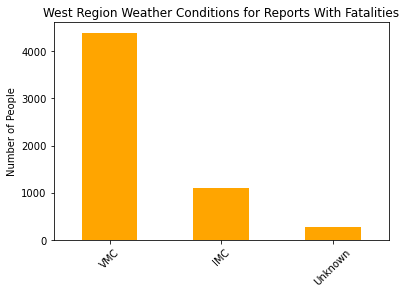

In [419]:
west_states.loc[west_states['total_fatal_injuries'] >= 1]['weather_condition'].value_counts().plot(kind='bar', 
         title="West Region Weather Conditions for Reports With Fatalities", 
         ylabel="Number of People", color='orange', rot=45);

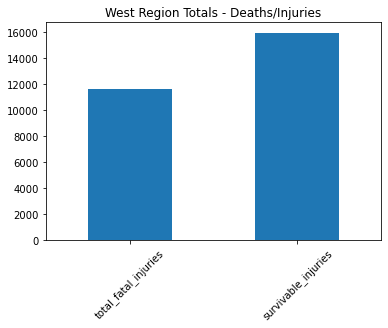

In [421]:
west_states.loc[:, ['total_fatal_injuries', 'survivable_injuries']].sum().plot(kind='bar', 
                    title= "West Region Totals - Deaths/Injuries", rot=45);

# TOP TEN MAKE STATS FOR WEST REGION

In [373]:
west_top_ten_list = list(west_states['make'].value_counts()[:10].index)

In [374]:
west_top_ten_df = west_states.loc[west_states['make'].isin(west_top_ten_list) == True]
west_top_ten_df['make'].value_counts()

cessna      10564
piper        5421
beech        1678
bell          994
boeing        491
bellanca      466
mooney        441
robinson      409
hughes        386
maule         337
Name: make, dtype: int64

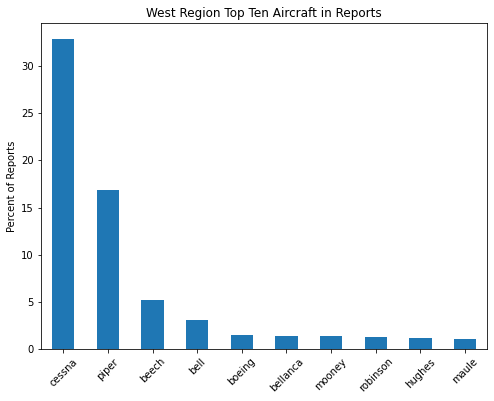

In [423]:
(west_states['make'].value_counts(normalize=True)[:10] * 100).plot(kind='bar', figsize=(8,6),
                            title="West Region Top Ten Aircraft in Reports", ylabel= "Percent of Reports", rot=45);

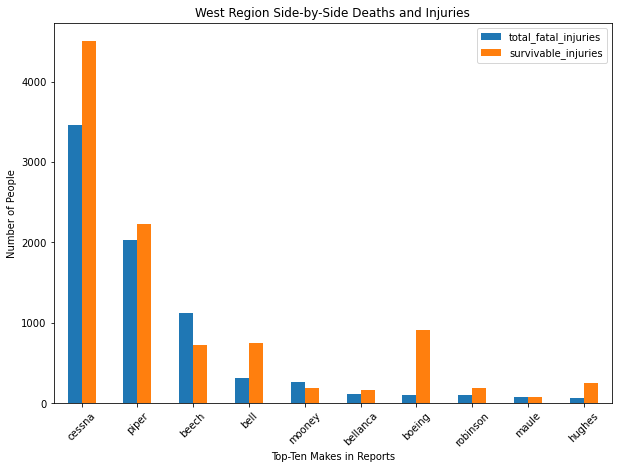

In [425]:
west_top_ten_df.groupby('make')[["total_fatal_injuries", 'survivable_injuries']].sum().sort_values(by="total_fatal_injuries", ascending=False).plot(
    kind='bar', figsize=(10,7), title="West Region Side-by-Side Deaths and Injuries", 
    ylabel="Number of People", xlabel= "Top-Ten Makes in Reports", rot=45);

# COMPARISON CHARTS

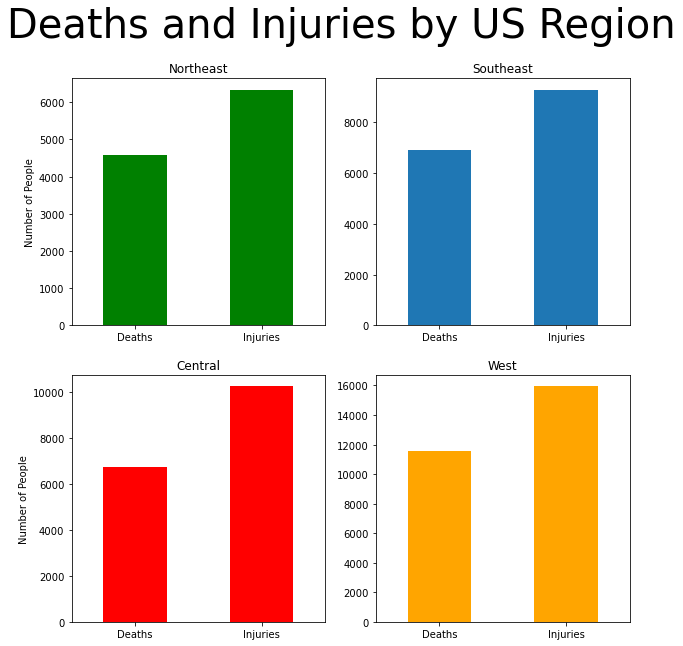

In [258]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(10,10))
fig.suptitle("Deaths and Injuries by US Region", fontsize=40)
n_plot.plot(kind='bar', title='Northeast', ax=ax[0][0], ylabel="Number of People", rot=0, color='green')
s_plot.plot(kind='bar', title='Southeast', ax=ax[0][1], rot=0)
c_plot.plot(kind='bar', title='Central', ax=ax[1][0], ylabel="Number of People", rot=0, color='red')
w_plot.plot(kind='bar', title='West', ax= ax[1][1], rot=0, color='orange')
ax[0][0].set_xticklabels(["Deaths", "Injuries"])
ax[0][1].set_xticklabels(["Deaths", "Injuries"])
ax[1][1].set_xticklabels(["Deaths", "Injuries"])
ax[1][0].set_xticklabels(["Deaths", "Injuries"]);

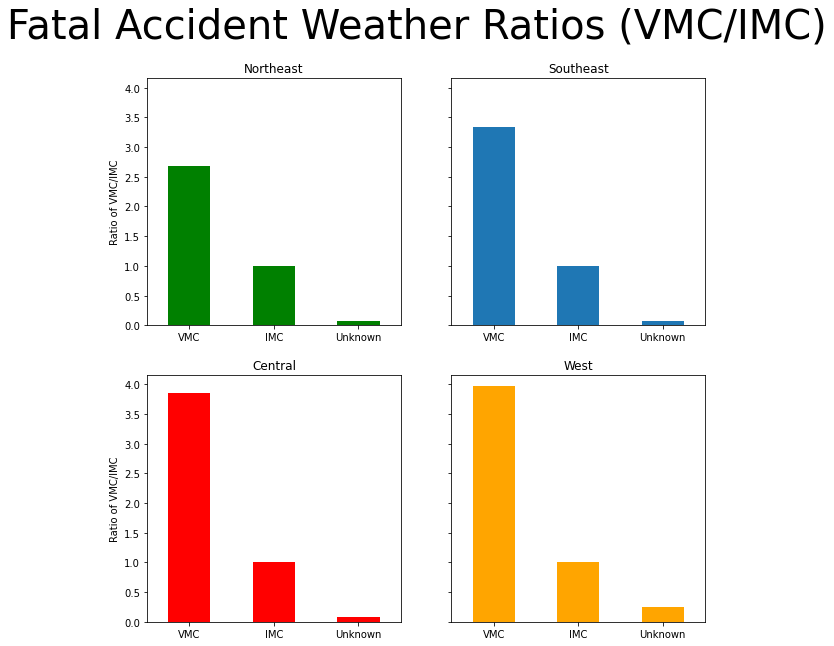

In [429]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(10,10), sharey=True)
fig.suptitle("Fatal Accident Weather Ratios (VMC/IMC)", fontsize=40)
ne_weather_ratio.plot(kind='bar', title='Northeast', ax=ax[0][0], ylabel="Ratio of VMC/IMC", rot=0, color='green')
se_weather_ratio.plot(kind='bar', title='Southeast', ax=ax[0][1], rot=0)
c_weather_ratio.plot(kind='bar', title='Central', ax=ax[1][0], ylabel="Ratio of VMC/IMC", rot=0, color='red')
w_weather_ratio.plot(kind='bar', title='West', ax= ax[1][1], rot=0, color='orange')
ax[0][0].set_xticklabels(["VMC", 'IMC', 'Unknown'])
ax[0][1].set_xticklabels(["VMC", 'IMC', 'Unknown'])
# ax[0][1].set_xticks([0, .5, 1, 1.5, 2, 2.5, 3, 3.5, 4])
ax[1][1].set_xticklabels(["VMC", 'IMC', 'Unknown'])
ax[1][0].set_xticklabels(["VMC", 'IMC', 'Unknown']);

# Adjusting the above values on a per-flight basis

In [261]:
northeast_states.shape

(10806, 28)

In [260]:
len(northeast_states)

10806

In [259]:
n_plot / len(northeast_states)

total_fatal_injuries    0.424209
survivable_injuries     0.585601
dtype: float64

In [262]:
np2 = n_plot / len(northeast_states)
sp2 = s_plot / len(southeast_states)
cp2 = c_plot / len(central_states)
wp2 = w_plot / len(west_states)

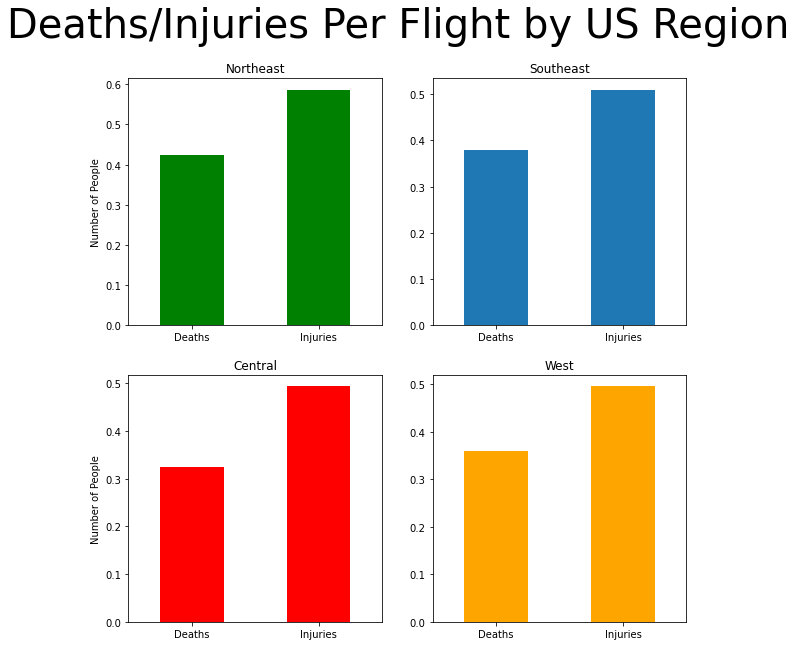

In [264]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(10,10))
fig.suptitle("Deaths/Injuries Per Flight by US Region", fontsize=40)
np2.plot(kind='bar', title='Northeast', ax=ax[0][0], ylabel="Number of People", rot=0, color='green')
sp2.plot(kind='bar', title='Southeast', ax=ax[0][1], rot=0)
cp2.plot(kind='bar', title='Central', ax=ax[1][0], ylabel="Number of People", rot=0, color='red')
wp2.plot(kind='bar', title='West', ax= ax[1][1], rot=0, color='orange')
ax[0][0].set_xticklabels(["Deaths", "Injuries"])
ax[0][1].set_xticklabels(["Deaths", "Injuries"])
ax[1][1].set_xticklabels(["Deaths", "Injuries"])
ax[1][0].set_xticklabels(["Deaths", "Injuries"]);

In [ ]:
southeast_states.loc[southeast_states['total_fatal_injuries'] >= 1]['weather_condition'].value_counts().plot(kind='bar', 
                            title="Weather Conditions for Reports With Fatalities", ylabel="Number of People");

# GENERAL EXPLORATION

In [17]:
df[df["investigation_type"] == "Accident"]['make'].value_counts()

Cessna                    21973
Piper                     11885
CESSNA                     4820
Beech                      4170
PIPER                      2799
                          ...  
HEBERLEIN RONALD              1
Larsen Charles Bennett        1
BROWN NARCISSE A              1
Sayer, Trevor A.              1
MICHAEL W MORGAN              1
Name: make, Length: 8170, dtype: int64

# Need to standardize the case of letters in this column

#### Adjusting the Manufacturer name of the aircraft to lower case

In [18]:
df['make'] = df['make'].str.lower()

### LOWERCASE Country Column

In [89]:
df['country'] = df['country'].str.lower()

### Gain access to the specific year of date

In [20]:
df['event_date'].dtype  # object
df["year_of_event"] = df['event_date'].map(lambda x: int(x[:4]))

### 1948 - 2022, median is from 1998 - overall span of 74 years

In [21]:
df['year_of_event'].describe()

count    88889.000000
mean      1999.206662
std         11.888226
min       1948.000000
25%       1989.000000
50%       1998.000000
75%       2009.000000
max       2022.000000
Name: year_of_event, dtype: float64

In [22]:
top_ten_accident_craft = df[df["investigation_type"] == "Accident"]['make'].value_counts(normalize=False)[:10]
top_ten_accident_craft

cessna      26793
piper       14684
beech        5177
bell         2662
boeing       1362
mooney       1311
robinson     1219
grumman      1158
bellanca     1040
hughes        925
Name: make, dtype: int64

In [23]:
list(top_ten_accident_craft.index)

['cessna',
 'piper',
 'beech',
 'bell',
 'boeing',
 'mooney',
 'robinson',
 'grumman',
 'bellanca',
 'hughes']

In [24]:
top_ten_incident_craft = df[df["investigation_type"] == "Incident"]['make'].value_counts(normalize=False)[:10]

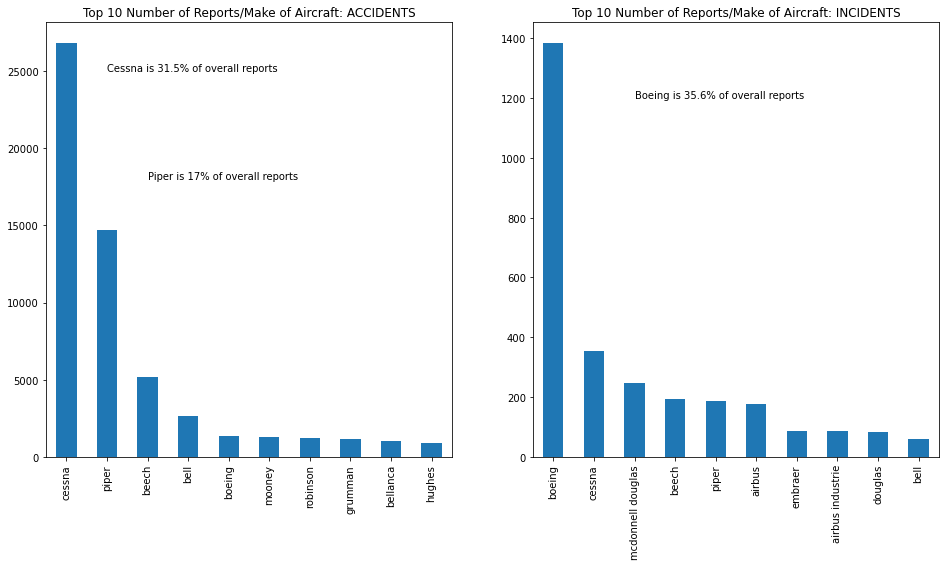

In [25]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 8))
ax1.set_title("Top 10 Number of Reports/Make of Aircraft: ACCIDENTS")
ax2.set_title("Top 10 Number of Reports/Make of Aircraft: INCIDENTS")
ax1.annotate(xy=(1, 25000), text="Cessna is 31.5% of overall reports")
ax1.annotate("Piper is 17% of overall reports", xy=(2, 18000))
ax2.annotate("Boeing is 35.6% of overall reports", xy=(2, 1200))
top_ten_accident_craft.plot(kind='bar', ax=ax1)
top_ten_incident_craft.plot(kind='bar', ax=ax2);

In [26]:
top_ten_accident_craft_normalized = df[df["investigation_type"] == "Accident"]['make'].value_counts(normalize=True)[:10]

In [27]:
top_ten_incident_craft_normalized = df[df["investigation_type"] == "Incident"]['make'].value_counts(normalize=True)[:10]

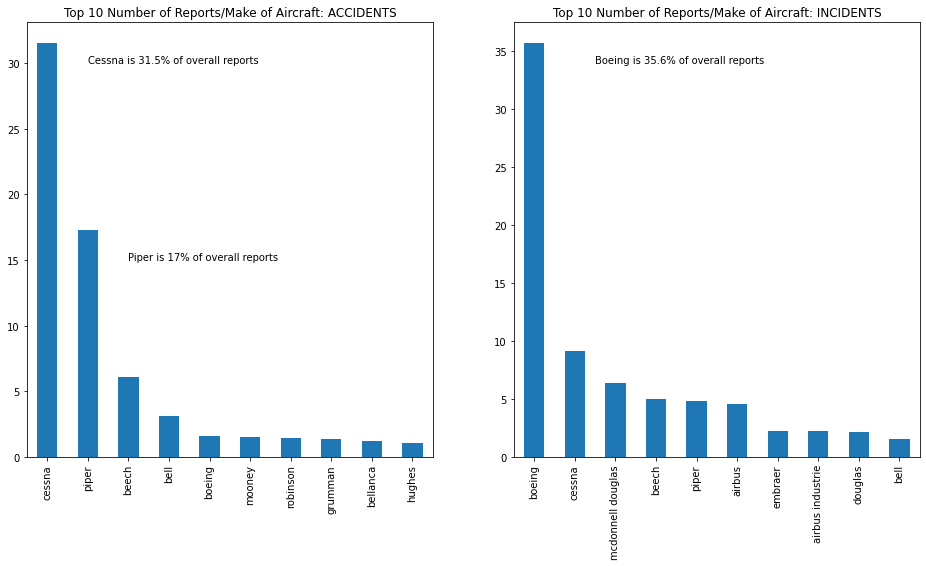

In [28]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 8))
ax1.set_title("Top 10 Number of Reports/Make of Aircraft: ACCIDENTS")
ax2.set_title("Top 10 Number of Reports/Make of Aircraft: INCIDENTS")
ax1.annotate(xy=(1, 30), text="Cessna is 31.5% of overall reports")
ax1.annotate("Piper is 17% of overall reports", xy=(2, 15))
ax2.annotate("Boeing is 35.6% of overall reports", xy=(1.5, 34))
(top_ten_accident_craft_normalized * 100).plot(kind='bar', ax=ax1)
(top_ten_incident_craft_normalized * 100).plot(kind='bar', ax=ax2);

### ACCIDENTS: Severe outcome not caused by instrumental failure

### INCIDENTS: Moderate outcome typically caused by instrumental failure

# TOP TEN ACCIDENT ANALYSIS

In [29]:
top_ten_accident_craft_normalized = df[df["investigation_type"] == "Accident"]['make'].value_counts(normalize=True)[:10]

In [30]:
top_ten_accident_craft

cessna      26793
piper       14684
beech        5177
bell         2662
boeing       1362
mooney       1311
robinson     1219
grumman      1158
bellanca     1040
hughes        925
Name: make, dtype: int64

In [33]:
print(top_ten_accident_craft, top_ten_accident_craft_normalized)

cessna      26793
piper       14684
beech        5177
bell         2662
boeing       1362
mooney       1311
robinson     1219
grumman      1158
bellanca     1040
hughes        925
Name: make, dtype: int64 cessna      0.315156
piper       0.172722
beech       0.060895
bell        0.031312
boeing      0.016021
mooney      0.015421
robinson    0.014339
grumman     0.013621
bellanca    0.012233
hughes      0.010880
Name: make, dtype: float64


# INCIDENT ANALYSIS

In [31]:
top_ten_incident_craft_normalized = df[df["investigation_type"] == "Incident"]['make'].value_counts(normalize=True)[:10]

In [32]:
print(top_ten_incident_craft, top_ten_incident_craft_normalized)

boeing               1383
cessna                356
mcdonnell douglas     247
beech                 195
piper                 186
airbus                179
embraer                88
airbus industrie       88
douglas                85
bell                   60
Name: make, dtype: int64 boeing               0.356995
cessna               0.091895
mcdonnell douglas    0.063758
beech                0.050336
piper                0.048012
airbus               0.046205
embraer              0.022716
airbus industrie     0.022716
douglas              0.021941
bell                 0.015488
Name: make, dtype: float64


### BOEING ANALYSIS

In [34]:
boeing_inc = df[(df['make'] == "boeing") & (df['investigation_type'] == 'Incident')]

In [35]:
boeing_inc.head(2)

,event_id,investigation_type,accident_number,event_date,location,country,airport_code,airport_name,injury_severity,aircraft_damage,aircraft_category,make,model,amateur_built,number_of_engines,engine_type,purpose_of_flight,air_carrier,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,survivable_injuries,year_of_event
320,20020917X02336,Incident,LAX82IA075,1982-02-15,"ONTARIO, CA",UNITED STATES,ONT,ONTARIO INTERNATIONAL,Incident,Minor,Airplane,boeing,B737-2H4,No,2.0,Turbo Jet,Unknown,Aircal,0,0,0,119.0,IMC,Approach,Probable Cause,0.0,1982
351,20020917X02151,Incident,FTW82IA062,1982-02-19,"HARLINGEN, TX",UNITED STATES,HRL,HARLINGEN IND.AIR PARK,Incident,Unknown,Airplane,boeing,B-727-200,No,3.0,Turbo Jet,Unknown,Mexicana Airlines,Unknown,Unknown,Unknown,83.0,IMC,Landing,Probable Cause,0.0,1982


### engine types:

In [91]:
engine = boeing_inc['engine_type'].value_counts()

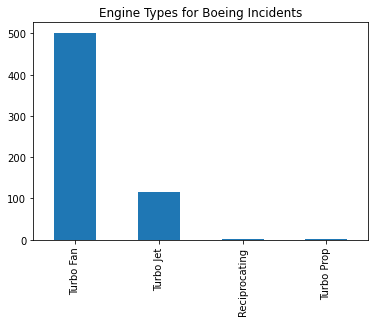

In [93]:
engine.drop("Unknown").plot(kind="bar", title=("Engine Types for Boeing Incidents"));

### number of engines

In [38]:
boe_eng_num = boeing_inc['number_of_engines'].value_counts()

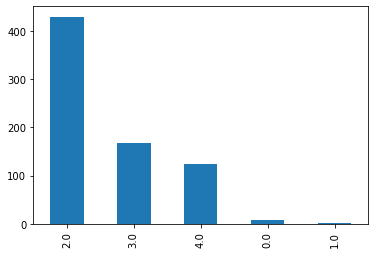

In [39]:
boe_eng_num.drop("Unknown").plot(kind='bar');

### Broad-phase info

In [40]:
boe_phase = boeing_inc['broad_phase_of_flight'].value_counts()
boe_phase['Unknown']

911

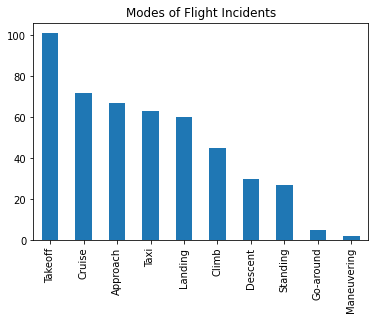

In [41]:
boe_phase.drop("Unknown").plot(kind='bar', title=("Modes of Flight Incidents"));

### Different models of Boeing

In [42]:
boeing_inc['model'].dtype

dtype('O')

In [43]:
boeing_inc['model'].value_counts(normalize=True)

737         0.255965
777         0.052061
747         0.046999
767         0.028200
757         0.026753
              ...   
747-212B    0.000723
737 823     0.000723
737-3A4     0.000723
747-240     0.000723
747-481F    0.000723
Name: model, Length: 347, dtype: float64

In [44]:
boeing_sts_model = boeing_inc[boeing_inc['model'].str.startswith("737") == True]

In [45]:
boeing_sts_model['model'].value_counts()

737          354
737-800       22
737-300       22
737-200       18
737-400       15
            ... 
737 - 4Q8      1
737-4Q8        1
737 7L9        1
737-8H4        1
737 - 476      1
Name: model, Length: 80, dtype: int64

### A lot of detail around model 737